## Projekt: Gehaltsanalyse

Daten einlesen:
Die Spalten "BasePay", "OvertimePay", "OtherPay" und "Benefits" sowie "Status" der Datei, enthalten Zahlen, die ich in Dezimalzahlen umwandeln möchte. Allerdings enthalten diese Spalten auch Strings, was beim import zu Fehlern führt. Deswegen definiere ich zunächst die convert_to_float-Funktion, und wende sie auf die problematischen Spalten an. Ich erhalte somit eine Dezimalzahl (float), wenn der Import erfolgreich war, und einen Missing Value bzw. den Wert "NaN", wenn es sich vorher um einen String gehalten hat. 

Die Spalte Status enthält nach näherer Betrachtung nur Strings und kann deswegen außen vor gelassen werden.

In [373]:
import numpy as np
import pandas as pd
import seaborn as sns

def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        return np.nan

df = pd.read_csv("../data/SF-Salaries/Salaries.csv.bz2", 
                 converters = {'BasePay': convert_to_float, 
                               'OvertimePay': convert_to_float, 
                               'OtherPay': convert_to_float, 
                               'Benefits': convert_to_float}, 
                 dtype = {'Status': str})
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Aufgabe 1: 

Visualisiere die Einkommensverteilung (BasePay oder TotalPayBenefits) für das Jahr 2014:

#### **Meine Gliederung für Aufgabe 1:**
**Schritt 1:** Ich filtere den Datensatz nach dem Jahr 2014.<br>
**Schritt 2:** Ich wähle ein Histogramm zur Visualsierung mit dem Einkommen ("BasePay" oder "TotalPayBenefits" auf der x-Achse. <br>
**Schritt 3:** Ich konfiguriere das Histogramm, um es anschaulicher zu machen, hierfür definiere ich die Variable "base_pay_2024_max"

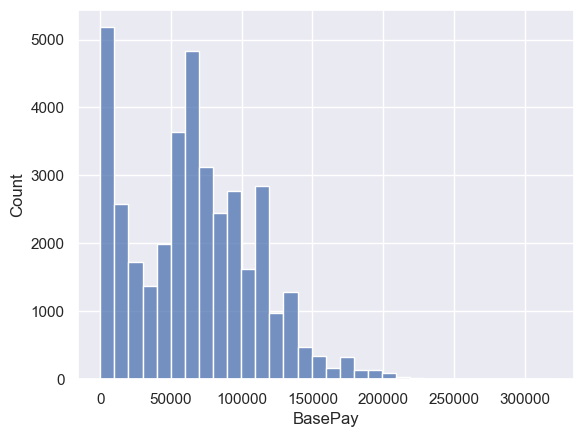

In [377]:
base_pay_2014_max = df.loc[df["Year"] == 2014, "BasePay"].max()
sns.histplot(data = df[df["Year"] == 2014] , x = "BasePay", binwidth = 10000, binrange = (0, base_pay_2014_max));

## Aufgabe 2:

Wir möchten nach San Francisco ziehen. Welchen öffentlichen Job sollten wir annehmen, um möglichst viel zu verdienen?

Der Job muss aber auch "erreichbar" sein für uns, "CAPTAIN III (POLICE DEPARTMENT)" wäre für uns so ohne weiteres vermutlich nicht erreichbar.

Ermittle also die häufigsten 10 Jobs (gruppiert nach der Spalte JobTitle) und plotte zu jedem JobTitle das durchschnittliche Gesamteinkommen (TotalPayBenefits) für das Jahr 2014 in einem Balkendiagramm. Für welchen Job sollten wir uns bewerben?

#### **Meine Gliederung zu Aufgabe 2**
**Schritt 1:** Zuerst muss ich die Daten nach dem Jahr 2014 filtern und die Job Title in einem neuen Dataframe gruppieren. Dann eine neue Funktion "count" erstellen und mit der "len" Funktion die Anzahl der Einträge zählen. Parallel lasse ich mir die das durchschnittliche Einkommen aus 2014 der jewiligen Jobbezeichnung aggregieren ("totalpay").<br><br>

**Schritt 2:** Anschließend sortiere ich das neue Dataframe absteigend auf Basis der neuen Variable "count".<br>
**Schritt 3:** Davon lasse ich mir die ersten 10 Einträge mit "iloc" ausgeben.<br>
**Schritt 4:** Ich plotte mir die 10 häufigsten "JobTitle" aus "df_jobs" in einem Balkendiagramm mit dem durchschnittlichen Gesamteinkommen auf der Y-Achse. <br>
**Schritt 5:** Ich konfiguriere das Balkendiagramm, damit man die "JobTitle" auch lesen kann und das Diagramm visuell ansprechender ist. 

In [433]:
df_2014 = df[df["Year"] == 2014]
df_jobs = df_2014\
            .groupby("JobTitle")\
            .agg(count = ("Id", len), totalpay = ("TotalPayBenefits", np.mean))\
            .reset_index()\
            .sort_values("count", ascending = False)\
            .iloc[0:10]
df_jobs

C:\Users\denni\AppData\Local\Temp\ipykernel_22408\544419777.py:4: FutureWarning: The provided callable <function mean at 0x0000020FCBDC7420> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(count = ("Id", len), totalpay = ("TotalPayBenefits", np.mean))\


,JobTitle,count,totalpay
939,Transit Operator,2479,86718.995478
843,Special Nurse,1478,36159.035528
724,Registered Nurse,1234,151715.116759
713,Public Svc Aide-Public Works,916,10705.586725
365,Firefighter,815,177701.855018
246,Custodian,804,70346.361915
657,Police Officer 3,783,170390.134815
721,Recreation Leader,690,7356.768667
616,Patient Care Assistant,652,66028.341871
271,Deputy Sheriff,617,149497.479157


C:\Users\denni\AppData\Local\Temp\ipykernel_22408\3006971407.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


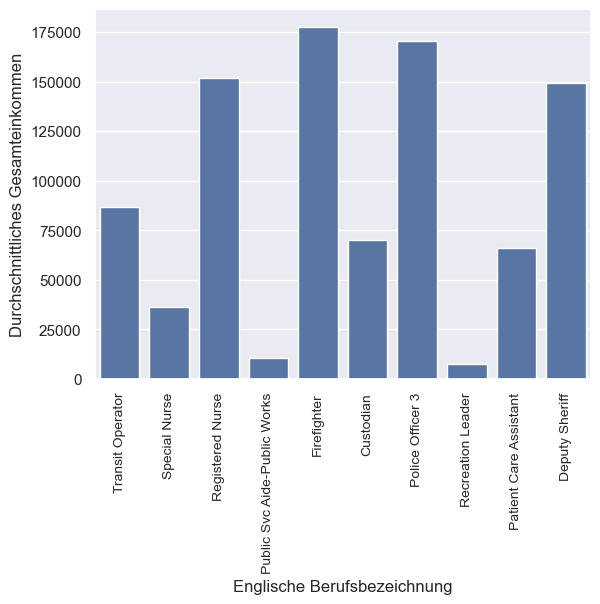

In [450]:
sns.set()
ax = sns.barplot(x = df_jobs["JobTitle"], y = df_jobs["totalpay"])

ax.set_xlabel("Englische Berufsbezeichnung")
ax.set_ylabel("Durchschnittliches Gesamteinkommen")

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=90,
    horizontalalignment='center',
    fontweight='light',
    fontsize='small'
);

**Antwort zur Fragestellung:** <br>
Aufgrund von Qualifikationen entfallen die Berufe "Special Nurse", "Registered Nurse", "Police Officer 3" und "Deputy Sheriff". <br>
Außerdem sind die Berufe "Public Svc Aide-Public Works" und "Recreational Leader" finanziell nicht ansprechend. <br>
Die Darstellung legt nahe, dass wir uns als "Firefighter" bewerben sollten. Dies ist jedoch nichts für jedermann. <br>
Darüber hinaus kämen also je nach Vorlieben auch "Transit Operator" (falls die jeweiligen Führerschein-Klassen vorhanden sind), "Custodian", oder "Patient Care Assistant" in dieser Reihenfolge infrage. <br>

## Aufgabe 3: 

a) Erstelle ein Balkendiagram mit verschiedenen Balken:<br>
<br>
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2011<br>
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2012<br>
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2013<br>
- Durchschnittliches Einkommen (TotalPayBenefits) im Jahr 2014<br>

b) Plotte zusätlich zum durchschnittlichen Gesamteinkommen (TotalPayBenefits) das durchschnittliche Grundgehalt "BasePay" pro Jahr.<br>
<br>
Die Grafik soll dann wie folgt aussehen: Hier klicken (Spoiler)<br>

#### **Meine Gliederung zu Aufgabe 3a:**
**Schritt 1:** Erst einmal gruppiere ich das Dataframe nach dem Jahr und aggregiere dabei das durchschnittliche Gesamteinkommen. <br>
**Schritt 2:** Balkendiagramm erstellen und ggf. konfigurieren

C:\Users\denni\AppData\Local\Temp\ipykernel_22408\4178723478.py:3: FutureWarning: The provided callable <function mean at 0x0000020FCBDC7420> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(avgpay = ("TotalPayBenefits", np.mean))\


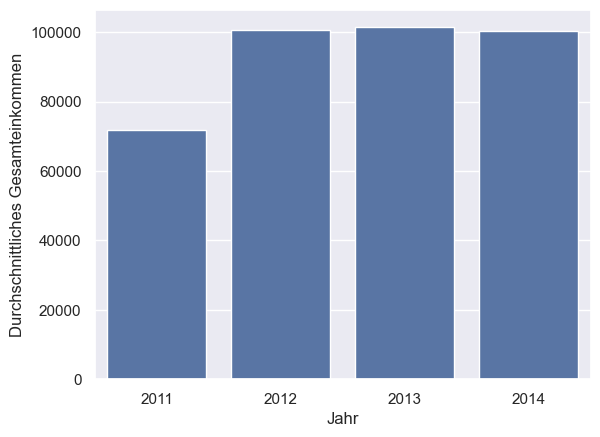

In [519]:
df_3 = df\
        .groupby("Year")\
        .agg(avgpay = ("TotalPayBenefits", np.mean))\
        .reset_index()

ax = sns.barplot(x = df_3["Year"], y = df_3["avgpay"])

ax.set_xlabel("Jahr")
ax.set_ylabel("Durchschnittliches Gesamteinkommen");

**Meine Gliederung zu Aufgabe 3b:**<br>
**Schritt 1:** Hier muss ich die Balken nach Jahr gruppieren und dann 2 Variablen aggregieren, "avg BasePay" und "avg TotalPayBenefits", <br>
**Schritt 2:** Anschließend muss ich die "melt" Funktion benutzen, um die Variablen in eine Spalte zu bekommen für jedes Jahr <br>
**Schritt 3:** Konfigurieren des Diagramms.

C:\Users\denni\AppData\Local\Temp\ipykernel_22408\51617514.py:3: FutureWarning: The provided callable <function mean at 0x0000020FCBDC7420> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(avg_basepay = ("BasePay", np.mean), avg_totalpay = ("TotalPayBenefits", np.mean))\


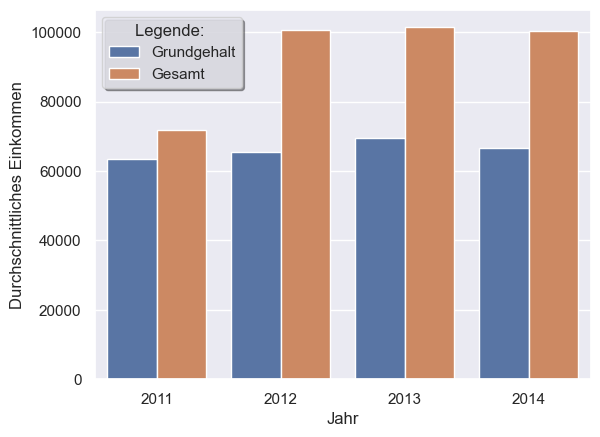

In [552]:
df_3 = df\
        .groupby("Year")\
        .agg(avg_basepay = ("BasePay", np.mean), avg_totalpay = ("TotalPayBenefits", np.mean))\
        .reset_index()\
        .melt(id_vars = ["Year"])

ax = sns.barplot(x = df_3["Year"], y = df_3["value"], hue = df_3["variable"])

ax_legend = ax.legend()
ax_legend.shadow = True
ax_legend.set_title("Legende: ")
ax_legend.texts[0].set_text("Grundgehalt")
ax_legend.texts[1].set_text("Gesamt")

ax.set_xlabel("Jahr")
ax.set_ylabel("Durchschnittliches Einkommen");